In [ ]:
!pip install tensorflow==2.1.0

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds=GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode=getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/My Drive/CSE583/")
Dataset='Data'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows,img_cols=112,112

images=[]
labels=[]

for category in Data_Dir:
  folder_path=os.path.join(Dataset,category)
  for img in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img)
    img=cv2.imread(img_path)
    try:
      grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
      images.append(resized_img)
      labels.append(category)
    except Exception as e:
      print('Exception:',e)

images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

(train_X,test_X,train_y,test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)


In [10]:
import tensorflow as tf 
tf.__version__

'2.1.0'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_classes=2
batch_size=32
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.summary())


In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='face_mask_detection_flowchart.png')

In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

epochs=50
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
fitted_model=model.fit(train_X,train_y,epochs=epochs,validation_split=0.25)

Train on 1495 samples, validate on 499 samples
Epoch 1/50
1495/1495 [==============================] - 9s 6ms/sample - loss: 0.7014 - accuracy: 0.6341 - val_loss: 0.5537 - val_accuracy: 0.7415
Epoch 2/50
1495/1495 [==============================] - 1s 852us/sample - loss: 0.4512 - accuracy: 0.7819 - val_loss: 0.3817 - val_accuracy: 0.8277
Epoch 3/50
1495/1495 [==============================] - 1s 857us/sample - loss: 0.3240 - accuracy: 0.8682 - val_loss: 0.3155 - val_accuracy: 0.8597
Epoch 4/50
1495/1495 [==============================] - 1s 854us/sample - loss: 0.2348 - accuracy: 0.9110 - val_loss: 0.2700 - val_accuracy: 0.8958
Epoch 5/50
1495/1495 [==============================] - 1s 853us/sample - loss: 0.1901 - accuracy: 0.9224 - val_loss: 0.2406 - val_accuracy: 0.9058
Epoch 6/50
1495/1495 [==============================] - 1s 844us/sample - loss: 0.1267 - accuracy: 0.9485 - val_loss: 0.2890 - val_accuracy: 0.9098
Epoch 7/50
1495/1495 [==============================] - 1s 848us/sa

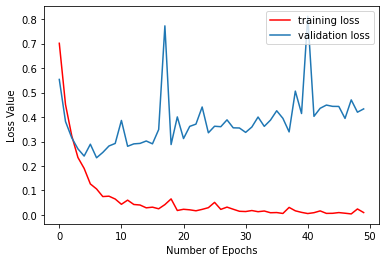

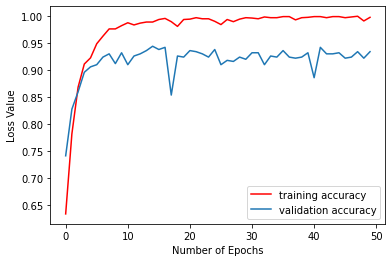

In [19]:

from matplotlib import pyplot as plt
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [20]:
model.save('face_mask_detection_system.h5')